# EDA
Questo notebook verrà usato per l'exploratory data analysis non comprensiva di machine learning

In [5]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import EDA
from shapely.geometry import Point

from functions import *
import make_dataset as m_d

sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2.5})
sns.set(rc={'figure.figsize':(7,6)})


### Per usare multi cartelle (cookiecutter)
#import sys
#sys.path.append('./../src')
#print(sys.path)

In [6]:
#Importiamo il database dei tweets

df=pd.read_csv("data/processed/twitter_final.csv")


#col_list = list(df)
#col_list[6], col_list[5] = col_list[5], col_list[6]
#df.plot('municipal')
df

,month,day,hours,temperature,rain,cellId,municipal,language
0,11,1,0.0,13.2,0.0,5201,Trento,it
1,11,1,0.0,8.4,0.0,7167,Pinzolo,tl
2,11,1,0.5,8.8,0.0,8151,Cavalese,en
3,11,1,0.5,13.2,0.0,2855,Rovereto,it
4,11,1,0.5,11.8,0.0,6838,San Michele all'Adige,ru
...,...,...,...,...,...,...,...,...
27936,12,31,0.0,-7.7,0.0,9922,Vigo di Fassa,it
27937,12,29,13.0,3.4,0.0,8513,Predazzo,it
27938,11,19,0.5,5.0,0.0,5799,Sant'Orsola Terme,it
27939,11,23,9.5,0.7,0.0,5799,Sant'Orsola Terme,it


# Plots

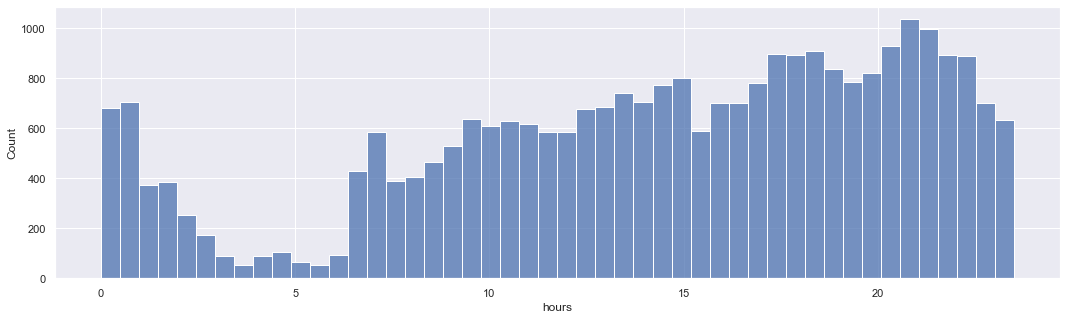

In [7]:
#Plot occurences versus tempo
plt.figure(figsize = (18,5))
sns.histplot(data=df, x="hours", bins=48)
plt.show()
#Vista la ciclicità del notte-giorno, l'histogram vien molto brutto; andiam di Nightingale

NightP=EDA.Nightingale_Plot(df["hours"])
NightP.render_notebook()
#Per qualche ragione servon librerie oscure

#Risultato ovvio: la gente twitta meno di notte che di giorno, verso la serva sembra essere il momento preferito

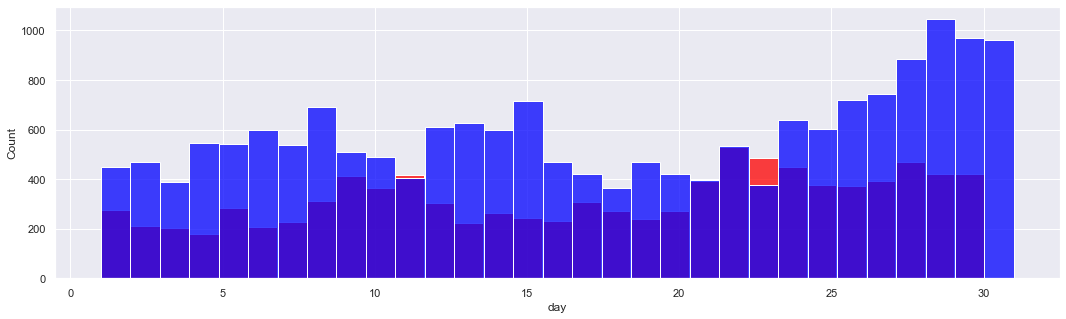

In [8]:
plt.figure(figsize = (18,5))
sns.histplot(data=df[df["month"]==11], x="day", bins=30, color="#FF0000")
sns.histplot(data=df[df["month"]==12], x="day", bins=31, color="#0000FF")
plt.show()

#Note: noiosi da disjointare in maniera sensata
#Nota: la gente twitta di più a Dicembre, soprattutto verso la fine (periodo di vacanze)

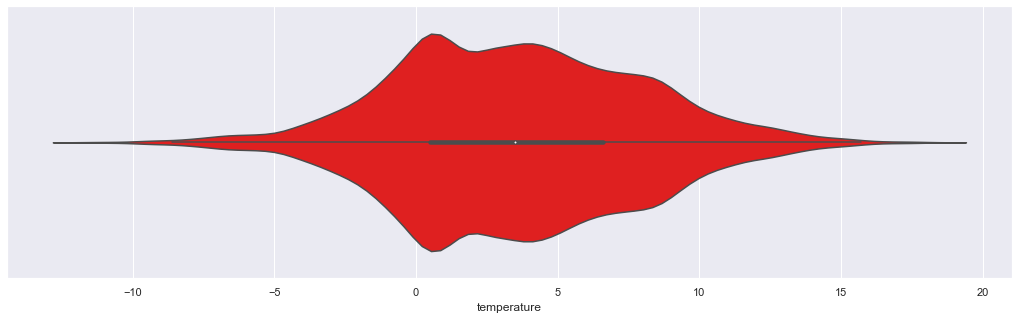

In [6]:
#Plot occurences versus temperatura
plt.figure(figsize = (18,5))
sns.violinplot(data=df, x="temperature", color="#FF0000")
plt.show()
#Qua violin funziona meglio, distribuzioni più continue

#Risultato: la gente twitta in temperature mild MA questo non ha senso perchè le temperature mild sono più probabili
#(in periodo invernale 5 gradi a trento sono molto tipici), questo grafico va rimodulato a distribuzione delle temperature

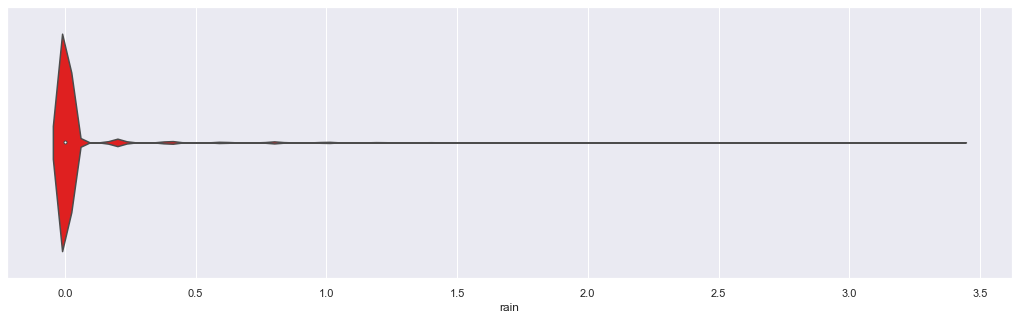

In [7]:
#Plot occurences versus rain
plt.figure(figsize = (18,5))
sns.violinplot(data=df, x="rain", color="#FF0000")
plt.show()

#Same as before, nella maggioranza dei casi la rain è 0, quindi gli unici casi rilevanti numericamente son quelli

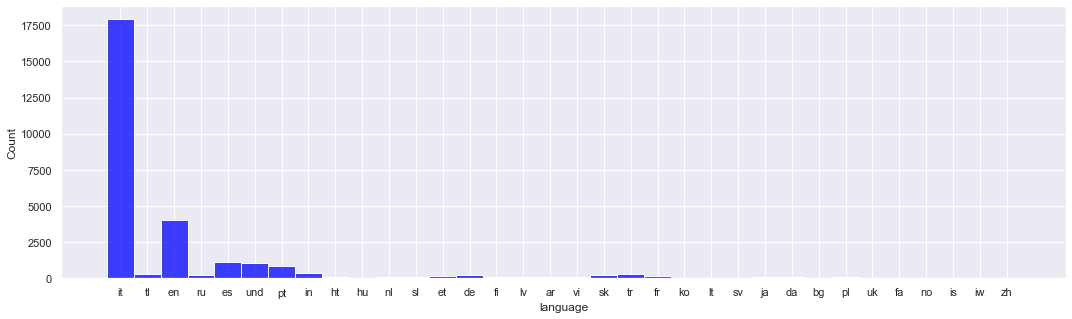

In [8]:
plt.figure(figsize = (18,5))
sns.histplot(data=df, x="language", bins=31, color="#0000FF")
plt.show()

#Italiano domina seguito da inglese, niente di strano
#Interessante sono i pochi tedeschi, ma per tardo autunno non è molto sorprendente

Index(['cellId', 'geometry'], dtype='object')


<AxesSubplot:>

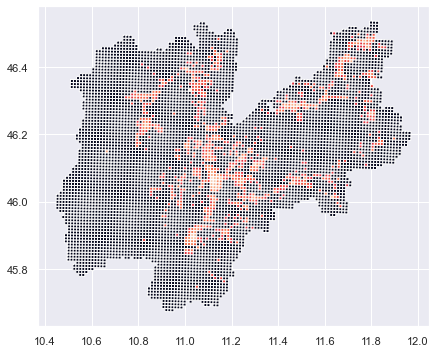

In [51]:
#Importiamo ora la grid
grid=m_d.safe_import("grid")

temp=[]
for i in range (0, len(grid)):
    temp.append( (grid.loc[i]["cellId"]==df["cellId"]).sum() )    
grid["Ntweets"]=temp

temp=[]
for i in range (0, len(grid)):
    temp.append( grid.loc[i]["Ntweets"]**0.07 )
grid["TweetsWeigh"]=temp


grid.plot("TweetsWeigh")
#Nota: questo plot lo devo creare pesando il numero di tweets in maniera diversa
#(Converto con distribuzione x^0.07) altrimenti il colore diventa tutto uguale

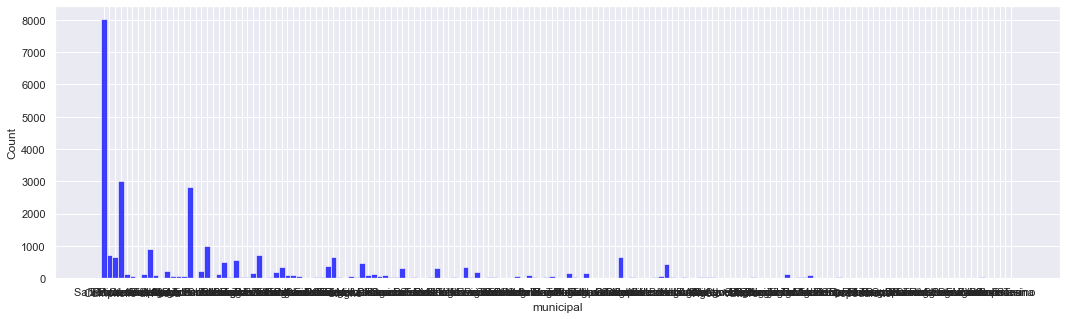

In [9]:
plt.figure(figsize = (18,5))
sns.histplot(data=df, x="municipal", bins=31, color="#0000FF")
plt.show()

#Trento domina nettamente
#Per il punto 3 non possiamo usare municipi perchè
# rappresentano classi pesantemente sbilanciate

# DA FARE:
## EDA ordine 1: comparare la distribuzione di tweets vs temperatura con la distribuzione di temperatura versus tempo (A scopo di vedere se la distribuzione è de facto piatta ma pesata male)  -> Mi aspetto un ce